In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [107]:
df_audi = pd.read_csv("audi.csv")

In [108]:
df_audi.shape

(10668, 9)

In [109]:
df_audi.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [110]:
df_audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [111]:
df_audi['diesel_yn'] = df_audi['fuelType'].apply(lambda x: 1 if 'diesel' in x.lower() else 0)
df_audi['petrol_yn'] = df_audi['fuelType'].apply(lambda x: 1 if 'petrol' in x.lower() else 0)
df_audi['hybrid_yn'] = df_audi['fuelType'].apply(lambda x: 1 if 'hybrid' in x.lower() else 0)
# splitting data based on transmission
df_audi['manual_yn'] = df_audi['transmission'].apply(lambda x: 1 if 'manual' in x.lower() else 0)
df_audi['semi_automatic_yn'] = df_audi['transmission'].apply(lambda x: 1 if 'semi-auto' in x.lower() else 0)
df_audi['automatic_yn'] = df_audi['transmission'].apply(lambda x: 1 if 'automatic' in x.lower() else 0)

In [112]:
df_audi['age'] = df_audi.year.apply(lambda x: x if x < 1 else 2020 - x)

In [113]:
df_audi.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'diesel_yn', 'petrol_yn', 'hybrid_yn', 'manual_yn',
       'semi_automatic_yn', 'automatic_yn', 'age'],
      dtype='object')

In [114]:
df_audi['model'].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64

In [115]:
df_audi['engineSize'].value_counts()

2.0    5169
1.4    1594
3.0    1149
1.6     913
1.5     744
1.0     558
4.0     154
1.8     126
2.5      61
0.0      57
2.9      49
1.2      31
4.2      25
5.2      23
3.2       5
1.9       4
2.7       3
4.1       2
6.3       1
Name: engineSize, dtype: int64

In [116]:
#df_audi.to_csv('Cleaned/audi_data_cleaned_vc.csv', index=False)

In [117]:
df_audi[ ['age','mileage','mpg','tax','engineSize','price']].corr()

,age,mileage,mpg,tax,engineSize,price
age,1.000000,0.789667,0.351281,-0.093066,0.031582,-0.592581
mileage,0.789667,1.000000,0.395103,-0.166547,0.070710,-0.535357
mpg,0.351281,0.395103,1.000000,-0.635909,-0.365621,-0.600334
tax,-0.093066,-0.166547,-0.635909,1.000000,0.393075,0.356157
engineSize,0.031582,0.070710,-0.365621,0.393075,1.000000,0.591262
price,-0.592581,-0.535357,-0.600334,0.356157,0.591262,1.000000


In [118]:
df_audi['price'].describe()

count     10668.000000
mean      22896.685039
std       11714.841888
min        1490.000000
25%       15130.750000
50%       20200.000000
75%       27990.000000
max      145000.000000
Name: price, dtype: float64

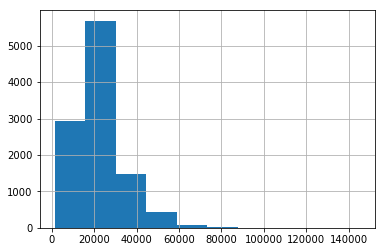

In [119]:
df_audi['price'].hist()

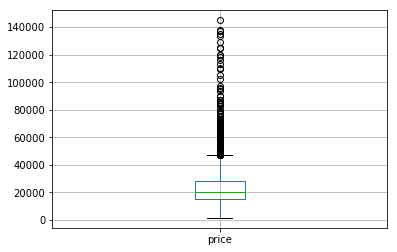

In [120]:
df_audi.boxplot(column=['price'])

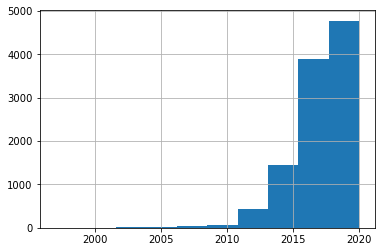

In [121]:
df_audi.year.hist()

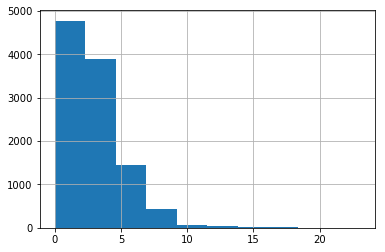

In [122]:
df_audi['age'].hist()

In [123]:
df_audi[df_audi['year'] < 2000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,diesel_yn,petrol_yn,hybrid_yn,manual_yn,semi_automatic_yn,automatic_yn,age
9788,A3,1998,4999,Automatic,55000,Petrol,265,30.4,1.8,0,1,0,0,0,1,22
10427,A8,1997,4650,Automatic,122000,Petrol,265,18.9,4.2,0,1,0,0,0,1,23


In [124]:
df_audi = df_audi[df_audi['year'] < 2021]


In [125]:
df_audi[df_audi['year'] > 2020]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,diesel_yn,petrol_yn,hybrid_yn,manual_yn,semi_automatic_yn,automatic_yn,age


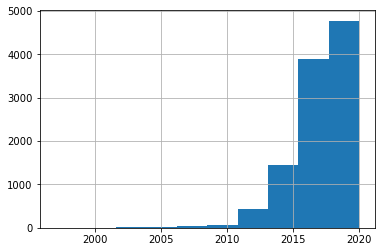

In [126]:
df_audi.year.hist()

In [127]:
df_audi.to_csv('Cleaned/audi_data_cleaned_vc.csv', index=False)

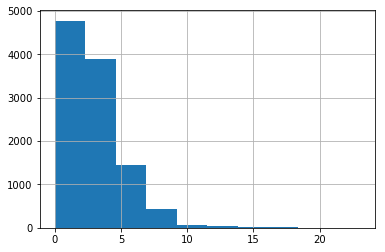

In [128]:
df_audi['age'].hist()

## Time to fit the data

In [129]:
df_audi['A_Series_yn'] = df_audi['model'].apply(lambda x: 1 if 'a' in x.lower() else 0)
df_audi['T_Series_yn'] = df_audi['model'].apply(lambda x: 1 if 't' in x.lower() else 0)
df_audi['S_Series_yn'] = df_audi['model'].apply(lambda x: 1 if 's' in x.lower() else 0)
df_audi['R_Series_yn'] = df_audi['model'].apply(lambda x: 1 if 'r' in x.lower() else 0)
df_audi['Q_Series_yn'] = df_audi['model'].apply(lambda x: 1 if 'q' in x.lower() else 0)

In [130]:
df_audi.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'diesel_yn', 'petrol_yn', 'hybrid_yn', 'manual_yn',
       'semi_automatic_yn', 'automatic_yn', 'age', 'A_Series_yn',
       'T_Series_yn', 'S_Series_yn', 'R_Series_yn', 'Q_Series_yn'],
      dtype='object')

In [131]:

df_model = df_audi[['price', 'mileage',
       'age','tax','mpg','engineSize', 'diesel_yn', 'petrol_yn',
       'hybrid_yn', 'manual_yn', 'semi_automatic_yn', 'automatic_yn','A_Series_yn',
       'T_Series_yn', 'S_Series_yn', 'R_Series_yn', 'Q_Series_yn']]


In [132]:
df_dum = pd.get_dummies(df_model)

In [133]:
X = df_dum.drop('price',axis=1)
y = df_dum.price.values

In [134]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [135]:
lm = LinearRegression()
lm.fit(X_train,y_train)
pred_lm = lm.predict(X_test)
print(f'MAE : {(mean_absolute_error(y_test, pred_lm))}, RMSE :  {np.sqrt((mean_squared_error(y_test, pred_lm)))}, R2 : {r2_score(y_test,pred_lm)}')

MAE : 3117.963811415198, RMSE :  4709.465982683625, R2 : 0.8412004769853174


In [136]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print(f'MAE : {(mean_absolute_error(y_test, pred_rf))}, RMSE :  {np.sqrt((mean_squared_error(y_test, pred_rf)))}, R2 : {r2_score(y_test,pred_rf)}')

MAE : 1738.700631876293, RMSE :  2640.543142081544, R2 : 0.9500779512374117


In [137]:
for i in range(20):
    print(f' TEST VALUE : {y_test[i]}, PREDICTED VALUE :  {pred_lm[i]} DIFFERENCE : {y_test[i] - pred_lm[i]}')

 TEST VALUE : 9990, PREDICTED VALUE :  9629.490922200785 DIFFERENCE : 360.50907779921545
 TEST VALUE : 22382, PREDICTED VALUE :  22574.076238233967 DIFFERENCE : -192.07623823396716
 TEST VALUE : 28990, PREDICTED VALUE :  28152.26380225874 DIFFERENCE : 837.7361977412584
 TEST VALUE : 30777, PREDICTED VALUE :  26257.443386678933 DIFFERENCE : 4519.556613321067
 TEST VALUE : 14950, PREDICTED VALUE :  12871.05590425474 DIFFERENCE : 2078.9440957452607
 TEST VALUE : 24365, PREDICTED VALUE :  26553.92646275455 DIFFERENCE : -2188.926462754549
 TEST VALUE : 30495, PREDICTED VALUE :  32080.085691969987 DIFFERENCE : -1585.0856919699872
 TEST VALUE : 29900, PREDICTED VALUE :  31304.8954212015 DIFFERENCE : -1404.8954212015014
 TEST VALUE : 15256, PREDICTED VALUE :  16606.743524329228 DIFFERENCE : -1350.7435243292275
 TEST VALUE : 24950, PREDICTED VALUE :  30119.041152456914 DIFFERENCE : -5169.041152456914
 TEST VALUE : 35495, PREDICTED VALUE :  34539.25124764697 DIFFERENCE : 955.748752353029
 TEST V

In [138]:
for i in range(20):
    print(f' TEST VALUE : {y_test[i]}, PREDICTED VALUE :  {pred_rf[i]} DIFFERENCE : {y_test[i] - pred_rf[i]}')

 TEST VALUE : 9990, PREDICTED VALUE :  8682.18 DIFFERENCE : 1307.8199999999997
 TEST VALUE : 22382, PREDICTED VALUE :  20427.62 DIFFERENCE : 1954.380000000001
 TEST VALUE : 28990, PREDICTED VALUE :  29520.41 DIFFERENCE : -530.4099999999999
 TEST VALUE : 30777, PREDICTED VALUE :  25839.083333333336 DIFFERENCE : 4937.916666666664
 TEST VALUE : 14950, PREDICTED VALUE :  16172.9 DIFFERENCE : -1222.8999999999996
 TEST VALUE : 24365, PREDICTED VALUE :  22242.9 DIFFERENCE : 2122.0999999999985
 TEST VALUE : 30495, PREDICTED VALUE :  31667.06 DIFFERENCE : -1172.0600000000013
 TEST VALUE : 29900, PREDICTED VALUE :  26211.3 DIFFERENCE : 3688.7000000000007
 TEST VALUE : 15256, PREDICTED VALUE :  15955.18 DIFFERENCE : -699.1800000000003
 TEST VALUE : 24950, PREDICTED VALUE :  23949.26 DIFFERENCE : 1000.7400000000016
 TEST VALUE : 35495, PREDICTED VALUE :  33567.21 DIFFERENCE : 1927.7900000000009
 TEST VALUE : 16990, PREDICTED VALUE :  17131.0 DIFFERENCE : -141.0
 TEST VALUE : 29490, PREDICTED VALUE

In [139]:
df_dum.columns

Index(['price', 'mileage', 'age', 'tax', 'mpg', 'engineSize', 'diesel_yn',
       'petrol_yn', 'hybrid_yn', 'manual_yn', 'semi_automatic_yn',
       'automatic_yn', 'A_Series_yn', 'T_Series_yn', 'S_Series_yn',
       'R_Series_yn', 'Q_Series_yn'],
      dtype='object')

In [140]:
X_test.head()

,mileage,age,tax,mpg,engineSize,diesel_yn,petrol_yn,hybrid_yn,manual_yn,semi_automatic_yn,automatic_yn,A_Series_yn,T_Series_yn,S_Series_yn,R_Series_yn,Q_Series_yn
10442,49500,8,30,62.8,2.0,1,0,0,1,0,0,1,0,0,0,0
2907,4352,1,145,51.4,1.6,1,0,0,1,0,0,1,0,0,0,0
7388,7000,1,150,47.9,2.0,1,0,0,0,1,0,1,0,0,0,0
3016,3925,0,145,44.1,1.5,0,1,0,0,1,0,1,0,0,0,0
7890,22000,4,145,51.4,1.4,0,1,0,1,0,0,1,0,0,0,0


In [141]:
columns = ['price', 'mileage', 'age', 'tax', 'mpg', 'engineSize', 'diesel_yn',
       'petrol_yn', 'hybrid_yn', 'manual_yn', 'semi_automatic_yn',
       'automatic_yn', 'A_Series_yn', 'T_Series_yn', 'S_Series_yn',
       'R_Series_yn', 'Q_Series_yn']

In [166]:
values = [1000,115915,16,150,50,2,1,0,0,1,0,0,1,0,0,0,0]

In [169]:
df = pd.DataFrame(columns=columns)

In [170]:
df.head()

,price,mileage,age,tax,mpg,engineSize,diesel_yn,petrol_yn,hybrid_yn,manual_yn,semi_automatic_yn,automatic_yn,A_Series_yn,T_Series_yn,S_Series_yn,R_Series_yn,Q_Series_yn


In [171]:
df.loc[-1] = values

In [172]:
df.head()

,price,mileage,age,tax,mpg,engineSize,diesel_yn,petrol_yn,hybrid_yn,manual_yn,semi_automatic_yn,automatic_yn,A_Series_yn,T_Series_yn,S_Series_yn,R_Series_yn,Q_Series_yn
-1,1000,115915,16,150,50,2,1,0,0,1,0,0,1,0,0,0,0


In [173]:
df.index = df.index + 1

In [174]:
df.head()

,price,mileage,age,tax,mpg,engineSize,diesel_yn,petrol_yn,hybrid_yn,manual_yn,semi_automatic_yn,automatic_yn,A_Series_yn,T_Series_yn,S_Series_yn,R_Series_yn,Q_Series_yn
0,1000,115915,16,150,50,2,1,0,0,1,0,0,1,0,0,0,0


In [175]:
V_train = df.drop('price',axis=1)
v_test = df.price.values

In [176]:
V_train

,mileage,age,tax,mpg,engineSize,diesel_yn,petrol_yn,hybrid_yn,manual_yn,semi_automatic_yn,automatic_yn,A_Series_yn,T_Series_yn,S_Series_yn,R_Series_yn,Q_Series_yn
0,115915,16,150,50,2,1,0,0,1,0,0,1,0,0,0,0


In [177]:
print(rf.predict(V_train))

[3590.4]


In [178]:
print(f'MAE : {(mean_absolute_error(v_test, rf.predict(V_train)))}, RMSE :  {np.sqrt((mean_squared_error(v_test, rf.predict(V_train))))}')

MAE : 2590.4, RMSE :  2590.4


#### I don't have enough data at the low price end to make a reasonable prediction of my own car! 
Would be nice for it to be worth what I predicted though :)
